<a href="https://colab.research.google.com/github/MididoddiSindhu05/Image-Denoising/blob/main/multiband.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1673: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/tmp/ipython-input-1-3216911391.py:59: RuntimeWarning: invalid value encountered in cast
  ], axis=-1).astype(np.uint8)


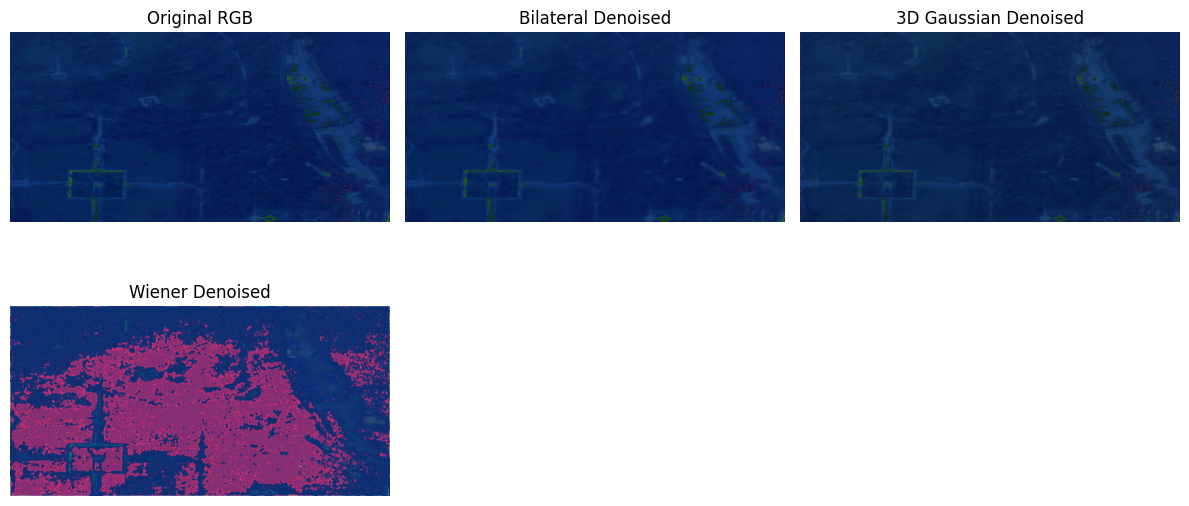

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter
from scipy.signal import wiener

# File paths
band1_path = "/content/band1_image2.rad"
band2_path = "/content/band2_image2.rad"
band3_path = "/content/band3_image2.rad"

# Image dimensions
height, width = 512, 1024

# Load bands
band1 = np.fromfile(band1_path, dtype=np.uint8).reshape((height, width))
band2 = np.fromfile(band2_path, dtype=np.uint8).reshape((height, width))
band3 = np.fromfile(band3_path, dtype=np.uint8).reshape((height, width))

# Stack into RGB
rgb = np.stack([band1, band2, band3], axis=-1)

# ------------------------------
# 1️⃣ Original
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(rgb)
plt.title("Original RGB")
plt.axis("off")

# ------------------------------
# 2️⃣ Bilateral (per-channel)
bilateral_rgb = np.stack([
    cv2.bilateralFilter(band1, d=9, sigmaColor=75, sigmaSpace=75),
    cv2.bilateralFilter(band2, d=9, sigmaColor=75, sigmaSpace=75),
    cv2.bilateralFilter(band3, d=9, sigmaColor=75, sigmaSpace=75)
], axis=-1)

plt.subplot(2, 3, 2)
plt.imshow(bilateral_rgb)
plt.title("Bilateral Denoised")
plt.axis("off")

# ------------------------------
# 3️⃣ 3D Gaussian
gaussian_rgb = gaussian_filter(rgb, sigma=(1, 1, 0.5)).astype(np.uint8)

plt.subplot(2, 3, 3)
plt.imshow(gaussian_rgb)
plt.title("3D Gaussian Denoised")
plt.axis("off")

# ------------------------------
# 4️⃣ Wiener filter (per-channel)
wiener_rgb = np.stack([
    wiener(band1, (5, 5)),
    wiener(band2, (5, 5)),
    wiener(band3, (5, 5))
], axis=-1).astype(np.uint8)

plt.subplot(2, 3, 4)
plt.imshow(wiener_rgb)
plt.title("Wiener Denoised")
plt.axis("off")

# ------------------------------
# Show all
plt.tight_layout()
plt.show()
